In [1]:
%load_ext autoreload
%autoreload 2

# Wavelet transform

In [2]:
# Read the content of Bfield.rtf
with open('Data/Bfield.rtf', 'r') as file:
    lines = file.readlines()

# Process each line
updated_lines = []
for line in lines:
    parts = line.split()
    if len(parts) >= 3:
        parts[2] = str(float(parts[2]) + 50)
    updated_lines.append(' '.join(parts) + '\n')

# Write the updated content back to Bfield.rtf
with open('Bfield.rtf', 'w') as file:
    file.writelines(updated_lines)

In [3]:
from Classes.magnetic_field import MagneticField, QuadraticField, LHCb_Field
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Example usage
Bf = LHCb_Field(r'Bfield.rtf')  # Assuming the file is a .rtf file
interpolated_Bfield = Bf.interpolated_field(0.0, 0.0, -25.0)
print(interpolated_Bfield)

[-0.08947375  0.1040855  -0.03802675]


In [5]:
import pywt
import numpy as np

# Assuming Bf is already defined and contains the interpolated_field method
# Define the grid for x, y, z coordinates
x_coords = np.linspace(-10, 10, 41)
y_coords = np.linspace(-10, 10, 41)
z_coords = np.linspace(-10, 10, 146)

# Initialize arrays to store the components of the magnetic field
Bx = np.zeros((len(x_coords), len(y_coords), len(z_coords)))
By = np.zeros((len(x_coords), len(y_coords), len(z_coords)))
Bz = np.zeros((len(x_coords), len(y_coords), len(z_coords)))

# Populate the arrays with the interpolated field values
for i, x in enumerate(x_coords):
    for j, y in enumerate(y_coords):
        for k, z in enumerate(z_coords):
            Bx[i, j, k], By[i, j, k], Bz[i, j, k] = Bf.interpolated_field(x, y, z)

# Perform 3D wavelet transform on each component
wavelet = 'db4'
coeffs_Bx = pywt.dwtn(Bx, wavelet)
coeffs_By = pywt.dwtn(By, wavelet)
coeffs_Bz = pywt.dwtn(Bz, wavelet)

# Print the shape of the transformed coefficients for verification
print("Shape of Bx coefficients:", {key: value.shape for key, value in coeffs_Bx.items()})
print("Shape of By coefficients:", {key: value.shape for key, value in coeffs_By.items()})
print("Shape of Bz coefficients:", {key: value.shape for key, value in coeffs_Bz.items()})

Shape of Bx coefficients: {'aaa': (24, 24, 76), 'aad': (24, 24, 76), 'ada': (24, 24, 76), 'add': (24, 24, 76), 'daa': (24, 24, 76), 'dad': (24, 24, 76), 'dda': (24, 24, 76), 'ddd': (24, 24, 76)}
Shape of By coefficients: {'aaa': (24, 24, 76), 'aad': (24, 24, 76), 'ada': (24, 24, 76), 'add': (24, 24, 76), 'daa': (24, 24, 76), 'dad': (24, 24, 76), 'dda': (24, 24, 76), 'ddd': (24, 24, 76)}
Shape of Bz coefficients: {'aaa': (24, 24, 76), 'aad': (24, 24, 76), 'ada': (24, 24, 76), 'add': (24, 24, 76), 'daa': (24, 24, 76), 'dad': (24, 24, 76), 'dda': (24, 24, 76), 'ddd': (24, 24, 76)}


In [6]:
import matplotlib.pyplot as plt

# Function to plot the original and transformed components
def plot_wavelet_transform(original, transformed, component_name):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot original component
    im1 = axs[0].imshow(original[:, :, original.shape[2] // 2], cmap='viridis', origin='lower')
    axs[0].set_title(f'Original {component_name}')
    fig.colorbar(im1, ax=axs[0])
    
    # Plot transformed component
    im2 = axs[1].imshow(transformed[:, :, transformed.shape[2] // 2], cmap='viridis', origin='lower')
    axs[1].set_title(f'Transformed {component_name}')
    fig.colorbar(im2, ax=axs[1])
    
    plt.tight_layout()
    plt.show()

# Plot the original and transformed Bx component
plot_wavelet_transform(Bx, pywt.waverec2(coeffs_Bx, wavelet, mode='periodization'), 'Bx')

# Plot the original and transformed By component
plot_wavelet_transform(By, pywt.waverec2(coeffs_By, wavelet, mode='periodization'), 'By')

# Plot the original and transformed Bz component
plot_wavelet_transform(Bz, pywt.waverec2(coeffs_Bz, wavelet, mode='periodization'), 'Bz')

ValueError: Expected sequence of coefficient arrays.

# TR

In [19]:
Bf.interpolator_bx.grid

(array([-4000., -3900., -3800., -3700., -3600., -3500., -3400., -3300.,
        -3200., -3100., -3000., -2900., -2800., -2700., -2600., -2500.,
        -2400., -2300., -2200., -2100., -2000., -1900., -1800., -1700.,
        -1600., -1500., -1400., -1300., -1200., -1100., -1000.,  -900.,
         -800.,  -700.,  -600.,  -500.,  -400.,  -300.,  -200.,  -100.,
            0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
          800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
         1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
         2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
         3200.,  3300.,  3400.,  3500.,  3600.,  3700.,  3800.,  3900.,
         4000.]),
 array([-4000., -3900., -3800., -3700., -3600., -3500., -3400., -3300.,
        -3200., -3100., -3000., -2900., -2800., -2700., -2600., -2500.,
        -2400., -2300., -2200., -2100., -2000., -1900., -1800., -1700.,
        -1600., -1500., -1400., -1300., -1200.

In [20]:
Bf = LHCb_Field('Data/Bfield.rtf')

In [21]:
Bs = np.zeros((Bf.interpolator_bx.grid[2].shape[0],3))

In [22]:
{int(i) : i for i in Bf.interpolator_bx.grid[2]}

{-500: -500.0,
 -400: -400.0,
 -300: -300.0,
 -200: -200.0,
 -100: -100.0,
 0: 0.0,
 100: 100.0,
 200: 200.0,
 300: 300.0,
 400: 400.0,
 500: 500.0,
 600: 600.0,
 700: 700.0,
 800: 800.0,
 900: 900.0,
 1000: 1000.0,
 1100: 1100.0,
 1200: 1200.0,
 1300: 1300.0,
 1400: 1400.0,
 1500: 1500.0,
 1600: 1600.0,
 1700: 1700.0,
 1800: 1800.0,
 1900: 1900.0,
 2000: 2000.0,
 2100: 2100.0,
 2200: 2200.0,
 2300: 2300.0,
 2400: 2400.0,
 2500: 2500.0,
 2600: 2600.0,
 2700: 2700.0,
 2800: 2800.0,
 2900: 2900.0,
 3000: 3000.0,
 3100: 3100.0,
 3200: 3200.0,
 3300: 3300.0,
 3400: 3400.0,
 3500: 3500.0,
 3600: 3600.0,
 3700: 3700.0,
 3800: 3800.0,
 3900: 3900.0,
 4000: 4000.0,
 4100: 4100.0,
 4200: 4200.0,
 4300: 4300.0,
 4400: 4400.0,
 4500: 4500.0,
 4600: 4600.0,
 4700: 4700.0,
 4800: 4800.0,
 4900: 4900.0,
 5000: 5000.0,
 5100: 5100.0,
 5200: 5200.0,
 5300: 5300.0,
 5400: 5400.0,
 5500: 5500.0,
 5600: 5600.0,
 5700: 5700.0,
 5800: 5800.0,
 5900: 5900.0,
 6000: 6000.0,
 6100: 6100.0,
 6200: 6200.0,
 630

In [23]:
Bs_ = {int(i) : np.zeros(3) for i in Bf.interpolator_bx.grid[2]}

In [24]:
for z in Bs_.keys():
    Bs_[z] = Bf.interpolated_field(0,0,z)

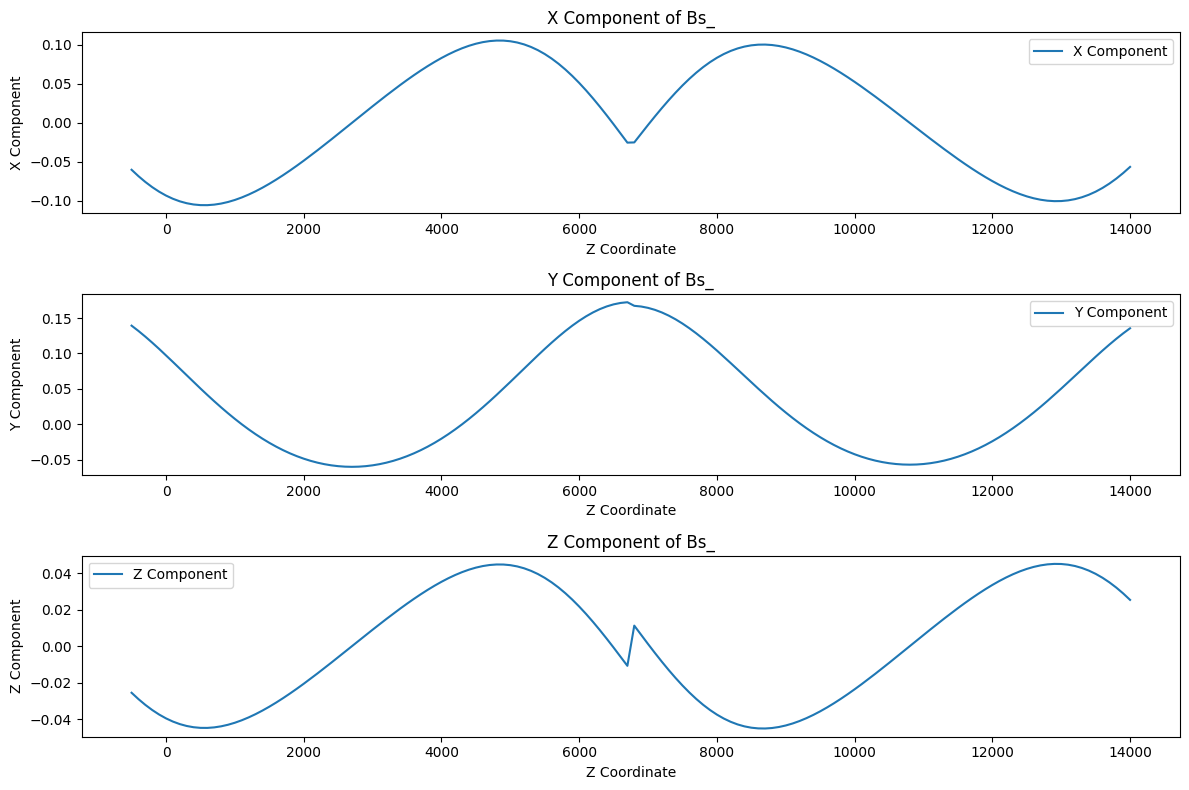

In [25]:
# Extract the z-coordinates and the corresponding components
z_coords = list(Bs_.keys())
x_components = [Bs_[z][0] for z in z_coords]
y_components = [Bs_[z][1] for z in z_coords]
z_components = [Bs_[z][2] for z in z_coords]

# Plot the components
plt.figure(figsize=(12, 8))

# Plot the x-component
plt.subplot(3, 1, 1)
plt.plot(z_coords, x_components, label='X Component')
plt.title('X Component of Bs_')
plt.xlabel('Z Coordinate')
plt.ylabel('X Component')
plt.legend()

# Plot the y-component
plt.subplot(3, 1, 2)
plt.plot(z_coords, y_components, label='Y Component')
plt.title('Y Component of Bs_')
plt.xlabel('Z Coordinate')
plt.ylabel('Y Component')
plt.legend()

# Plot the z-component
plt.subplot(3, 1, 3)
plt.plot(z_coords, z_components, label='Z Component')
plt.title('Z Component of Bs_')
plt.xlabel('Z Coordinate')
plt.ylabel('Z Component')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

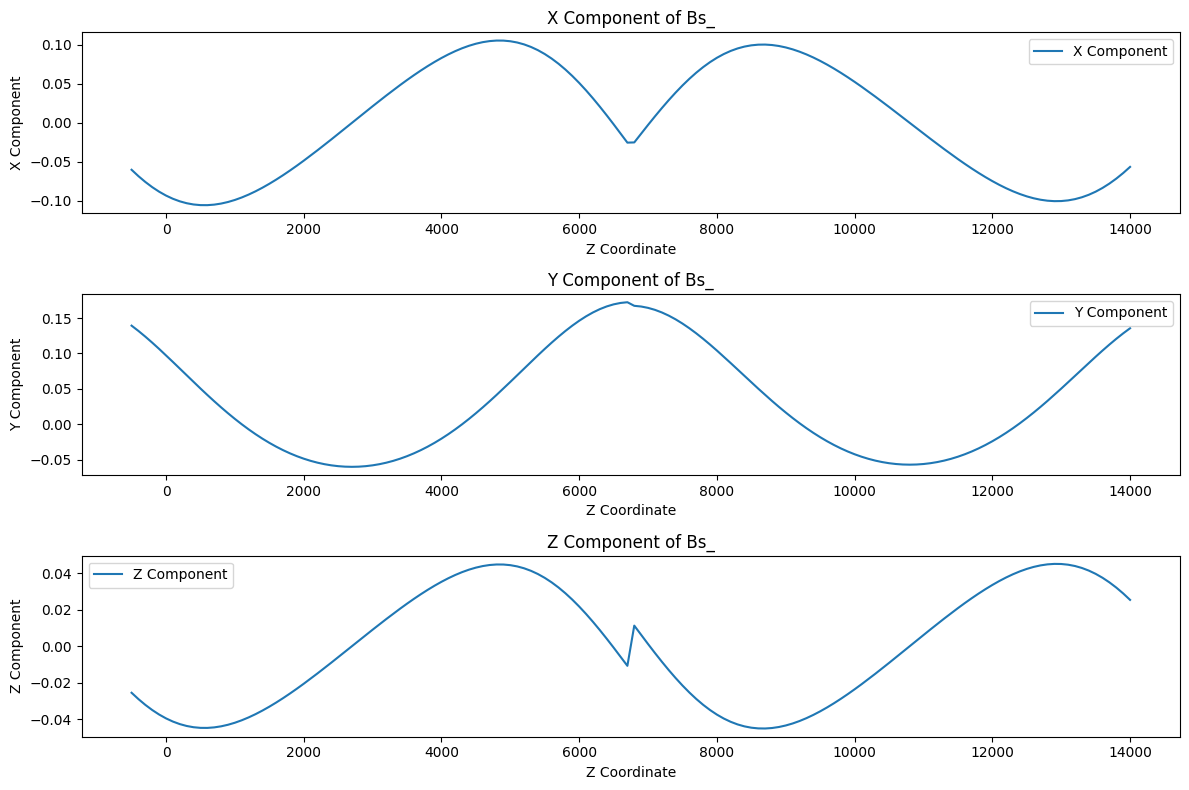

In [26]:
# Extract the z-coordinates and the corresponding components
z_coords = list(Bs_.keys())
x_components = [Bs_[z][0] for z in z_coords]
y_components = [Bs_[z][1] for z in z_coords]
z_components = [Bs_[z][2] for z in z_coords]

# Plot each component separately
plt.figure(figsize=(12, 8))

# Plot the x-component
plt.subplot(3, 1, 1)
plt.plot(z_coords, x_components, label='X Component')
plt.title('X Component of Bs_')
plt.xlabel('Z Coordinate')
plt.ylabel('X Component')
plt.legend()

# Plot the y-component
plt.subplot(3, 1, 2)
plt.plot(z_coords, y_components, label='Y Component')
plt.title('Y Component of Bs_')
plt.xlabel('Z Coordinate')
plt.ylabel('Y Component')
plt.legend()

# Plot the z-component
plt.subplot(3, 1, 3)
plt.plot(z_coords, z_components, label='Z Component')
plt.title('Z Component of Bs_')
plt.xlabel('Z Coordinate')
plt.ylabel('Z Component')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [27]:
np.sqrt((-311679.96432358)**2  + (515188.72815395)**2  + (796491.23616963)**2)/1e6

0.9984799021876494

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_field_slices(Bfield):
    """
    Plot the magnetic field slices for each z-coordinate with field strength represented by color
    and field direction represented by arrows.

    :param Bfield: 4D numpy array where the first three dimensions are x, y, z and the fourth dimension
                   is the magnetic field vector (Bx, By, Bz).
    """
    # Extract the size of the grid
    nx, ny, nz, _ = Bfield.shape

    # Create a meshgrid for x and y coordinates (assuming uniform spacing)
    x = np.arange(nx)
    y = np.arange(ny)
    X, Y = np.meshgrid(x, y)

    for z in range(nz):
        # Extract Bx, By, Bz for the current z-slice
        Bx = Bfield[:, :, z, 0]
        By = Bfield[:, :, z, 1]
        Bz = Bfield[:, :, z, 2]

        # Calculate the magnitude of the field at each point in the xy-plane
        B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

        # Create a figure and axis for plotting
        plt.figure(figsize=(8, 6))

        # Plot the magnitude of the field as a color map
        plt.contourf(X, Y, B_magnitude, cmap='plasma', levels=50)
        plt.colorbar(label='Field Strength |B|')

        # Plot the direction of the field using quiver (arrows)
        plt.quiver(X, Y, Bx, By, scale=50, color='white')

        # Add labels and title
        plt.title(f"Magnetic Field at z = {z}")
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)

        # Show the plot
        plt.show()

# plot_field_slices(B)



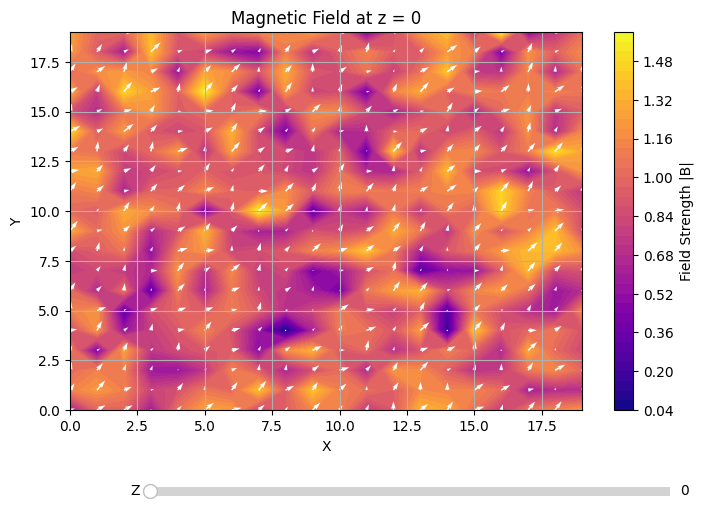

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def plot_field_slice(Bfield, z):
    """
    Plot a magnetic field slice for a given z-coordinate with field strength as color
    and field direction as arrows.

    :param Bfield: 4D numpy array where the first three dimensions are x, y, z and the fourth dimension
                   is the magnetic field vector (Bx, By, Bz).
    :param z: z-coordinate for which the field slice should be plotted.
    """
    # Extract the size of the grid
    nx, ny, nz, _ = Bfield.shape

    # Create a meshgrid for x and y coordinates (assuming uniform spacing)
    x = np.arange(nx)
    y = np.arange(ny)
    X, Y = np.meshgrid(x, y)

    # Extract Bx, By, Bz for the current z-slice
    Bx = Bfield[:, :, z, 0]
    By = Bfield[:, :, z, 1]
    Bz = Bfield[:, :, z, 2]

    # Calculate the magnitude of the field at each point in the xy-plane
    B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

    # Plot the magnitude of the field as a color map
    plt.contourf(X, Y, B_magnitude, cmap='plasma', levels=50)
    plt.colorbar(label='Field Strength |B|')

    # Plot the direction of the field using quiver (arrows)
    plt.quiver(X, Y, Bx, By, scale=50, color='white')

    # Add labels and title
    plt.title(f"Magnetic Field at z = {z}")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)

def update(val):
    # Clear the current plot and plot the new slice
    ax.cla()
    plot_field_slice(Bfield, int(slider.val))
    plt.draw()

# Assuming Bfield is a 4D numpy array (nx, ny, nz, 3)
Bfield = np.random.rand(20, 20, 10, 3)  # Example data

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.25)  # Leave space for the slider

# Plot the initial field slice
initial_z = 0
plot_field_slice(Bfield, initial_z)

# Add a slider for selecting the z-coordinate
ax_slider = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Z', 0, Bfield.shape[2] - 1, valinit=initial_z, valstep=1)

# Call update function when the slider is changed
slider.on_changed(update)

# Show the plot with the slider
plt.show()


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_magnetic_field(field_map, x_coords, y_coords, z_coords):
    """
    Plots a 3D quiver plot of the magnetic field map.

    :param field_map: A 4D NumPy array of shape (nx, ny, nz, 3) where the 4th dimension
                      contains the magnetic field vector [Bx, By, Bz].
    :param x_coords: 1D array of x coordinates.
    :param y_coords: 1D array of y coordinates.
    :param z_coords: 1D array of z coordinates.
    """

    # Create a meshgrid of x, y, z points
    X, Y, Z = np.meshgrid(x_coords, y_coords, z_coords, indexing='ij')

    # Extract the Bx, By, Bz components from the field map
    Bx = field_map[..., 0]
    By = field_map[..., 1]
    Bz = field_map[..., 2]

    # Create a 3D figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Quiver plot (downsampled for clarity, adjust step size as needed)
    step = 20  # Adjust this to reduce the number of arrows for clarity
    ax.quiver(X[::step, ::step, ::step], Y[::step, ::step, ::step], Z[::step, ::step, ::step],
              Bx[::step, ::step, ::step], By[::step, ::step, ::step], Bz[::step, ::step, ::step],
              length=0.01, normalize=False, color='b', linewidth=1)

    # Set plot labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Magnetic Field Vector Field')

    plt.show()

# Example usage
if __name__ == "__main__":
    # Define the magnetic field map (example data)
    x_coords = np.linspace(0, 10, 41)
    y_coords = np.linspace(0, 10, 41)
    z_coords = np.linspace(0, 10, 146)

    # Example field map: Random values for Bx, By, Bz (replace with actual data)
    field_map = B

    # Plot the magnetic field
    plot_magnetic_field(field_map, x_coords, y_coords, z_coords)


NameError: name 'B' is not defined

In [32]:
B = np.zeros((41,41,146,3))
for r in field:

    B[int(r[0]),int(r[1]),int(r[2])] = r[3:]

NameError: name 'field' is not defined

In [33]:
# Function to find indices of rows with incorrect number of elements
def find_invalid_rows(file_path):
    invalid_rows = []

    # Read the file line by line
    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Check each line
        for i, line in enumerate(lines):
            # Split the line by spaces
            elements = line.split()

            # If the number of elements is not 6, record the row index (i+1 for human-readable index)
            if len(elements) != 6:
                invalid_rows.append(i + 1)

    return invalid_rows

# Path to the file
file_path = 'Data/Bfield.rtf'  # Update with your file path

# Find and print invalid row indices
invalid_row_indices = find_invalid_rows(file_path)
if invalid_row_indices:
    print(f"Rows with incorrect number of elements: {invalid_row_indices}")
else:
    print("All rows have the correct number of elements.")


All rows have the correct number of elements.


/Users/georgescriven/Documents/GitHub/TrackExtrapolation/magnetic_field.py:11: RuntimeWarning: overflow encountered in scalar power
  Bx = self.B0 * -4*z**2 - 4* z  # Parabolic in Z
/Users/georgescriven/Documents/GitHub/TrackExtrapolation/magnetic_field.py:12: RuntimeWarning: overflow encountered in scalar power
  By = self.B0 * -4*z**2 - 4* z  # Parabolic in Z
/Users/georgescriven/anaconda3/envs/Q_env/lib/python3.10/site-packages/numpy/_core/numeric.py:1710: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
/Users/georgescriven/anaconda3/envs/Q_env/lib/python3.10/site-packages/numpy/_core/numeric.py:1714: RuntimeWarning: invalid value encountered in multiply
  multiply(a0, b2, out=tmp)
/Users/georgescriven/Documents/GitHub/TrackExtrapolation/magnetic_field.py:11: RuntimeWarning: invalid value encountered in scalar subtract
  Bx = self.B0 * -4*z**2 - 4* z  # Parabolic in Z
/Users/georgescriven/Documents/GitHub/TrackExtrapolation/magnetic_field.py:12: Run

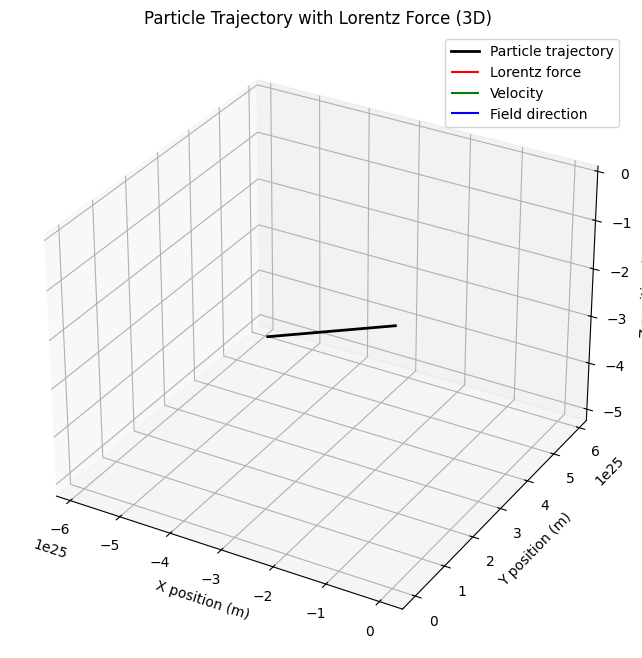

In [ ]:
# main_script.py

from magnetic_field import Quadratic_Field
from particle import Particle
from Simulators import RK4_sim

def RK4_simulate_particles():
    B0 = 10         # Base magnetic field strength (Tesla)
    dt = 1e-1     # Time step (seconds)
    num_steps = 1000  # Number of steps in the simulation

    # Create a magnetic field
    magnetic_field = Quadratic_Field(B0)

    # Create a particle (charge, mass, initial position, initial velocity in the z-direction)
    electron = Particle(charge=-1.6e-19, mass=9.11e-31, position=[0, 0, 0], velocity=[0, 0, 1e6])

    # Create a simulation for the particle
    electron_simulation = RK4_sim(electron, magnetic_field, dt, num_steps)

    # Run simulation
    electron_simulation.run()

    # Plot the trajectory with the magnetic field
    electron_simulation.plot_trajectory_with_lorentz_force()

# Run the simulation
RK4_simulate_particles()

In [7]:
from Classes.magnetic_field import Quadratic_Field, LHCb_Field
from Classes.particle import Particle, particle_state
from Classes.Simulators import RK4_sim_dt, RK4_sim_dz

import numpy as np

data = 'Data/Bfield_recentred.rtf'
dt = 1e-1     # Time step (seconds)
num_steps = 14000  # Number of steps in the simulation

# Natural units: c = 1, ħ = 1
# Charge of electron in natural units (e = 1)
e_charge = -1.0
# Mass of electron in natural units (me = 511 keV/c^2)
e_mass = 511e3  # in eV

# Charge and mass of proton in natural units
p_charge = 1.0
p_mass = 938.272e6  # in eV

# Charge and mass of neutron in natural units
n_charge = 0.0
n_mass = 939.565e6  # in eV

# Mass of pion in natural units
pi_mass = 139.57018e6  # in eV

# Mass of muon in natural units
mu_mass = 105.6583745e6  # in eV

# field = LHCb_Field('Data/Bfield.rtf')
Qfield = Quadratic_Field(1e-3)
LHCbField = LHCb_Field(data)

In [18]:
class particle_state:

    def __init__(self, Ptype, position, tx, ty, momentum, charge):
        self.Ptype = Ptype
        self.state = {'x' : position[0], 'y' : position[1], 'tx' : tx, 'ty' : ty, 'q/p' : charge/np.linalg.norm(momentum)}
        self.state_histores = [self.state.copy()]
        self.record_state()

        print(f'init state : {self.state}')
    def update_state(self, state):
        self.state = state

    def record_state(self):
        self.state_histores.append(self.state.copy())

    def get_state(self):
        return self.state

    def get_state_histores(self):
        return self.state_histores

In [19]:
particle_state_electron = [particle_state(Ptype='Electron', position=[20, 20], tx=0, ty=0, momentum=[0, 0, 0.75 * e_mass], charge=e_charge)]

init state : {'x': 20, 'y': 20, 'tx': 0, 'ty': 0, 'q/p': -2.609262883235486e-06}


In [20]:
np.abs([1,-1,1])

array([1, 1, 1])

In [17]:
np.linalg.norm([1,-1,1])

1.7320508075688772

# Peer methods demo

In [63]:
import numpy as np
from scipy.linalg import solve

# Define parameters
s = 3  # Number of stages
h = 0.1  # Step size
t_n = 0  # Initial time
y_n = 1  # Initial value

# Define coefficients for peer method
a = np.array([[0.5, 0.25, 0.25],
              [0.25, 0.5, 0.25],
              [0.25, 0.25, 0.5]])  # Coupling matrix
b = np.array([1/3, 1/3, 1/3])  # Final weights
c = np.array([0.2, 0.5, 0.8])  # Nodes

# Define the function f(t, y)
def f(t, y):
    return -y + np.sin(t)

# Define right-hand side vector b for the linear system
def rhs_vector(y_n, h, t_n, c, f):
    return np.array([y_n + h * f(t_n + c[j] * h, y_n) for j in range(s)])

# Solve coupled stage equations
def solve_stages(a, rhs):
    return solve(a, rhs)

# Compute the solution
rhs = rhs_vector(y_n, h, t_n, c, f)
stages = solve_stages(a, rhs)
y_n1 = y_n + h * np.dot(b, [f(t_n + c[i] * h, stages[i]) for i in range(s)])

# Output results
print("Stages:", stages)
print("Next value y_n+1:", y_n1)


Stages: [0.89301021 0.90500241 0.91697662]
Next value y_n+1: 0.9144967758979955


In [ ]:
from functools import partial
from multiprocessing import Pool
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
import timeit

# Define a standalone function for parallel computation of stages
def compute_stage(index, a, rhs):
    return solve(a, rhs)[index]

# Parallel computation of the stages (corrected)
def compute_peer_parallel(y_n, h, t_n):
    rhs = np.array([y_n + h * f(t_n + c[j] * h, y_n) for j in range(s)])
    with Pool(processes=s) as pool:
        stages = pool.map(partial(compute_stage, a=a, rhs=rhs), range(s))
    stages = np.array(stages)
    y_n1 = y_n + h * np.dot(b, [f(t_n + c[i] * h, stages[i]) for i in range(s)])
    return y_n1

# Define the function f(t, y)
def f(t, y):
    return -y + np.sin(t)

# Define the integrate function
def integrate(method, y_n, h, steps):
    t_values = [0]
    y_values = [y_n]
    for step in range(steps):
        t_n = t_values[-1]
        y_n = y_values[-1]
        y_n1 = method(y_n, h, t_n)
        t_values.append(t_n + h)
        y_values.append(y_n1)
    return np.array(t_values), np.array(y_values)

# Define the sequential method for comparison
def compute_peer_sequential(y_n, h, t_n):
    rhs = np.array([y_n + h * f(t_n + c[j] * h, y_n) for j in range(s)])
    stages = solve(a, rhs)
    y_n1 = y_n + h * np.dot(b, [f(t_n + c[i] * h, stages[i]) for i in range(s)])
    return y_n1

# Parameters
s = 3  # Number of stages
h = 0.1  # Step size
y_n = 1  # Initial value
steps = 100  # Number of steps
a = np.array([[0.5, 0.25, 0.25],
              [0.25, 0.5, 0.25],
              [0.25, 0.25, 0.5]])  # Coupling matrix
b = np.array([1/3, 1/3, 1/3])  # Final weights
c = np.array([0.2, 0.5, 0.8])  # Nodes

# Measure execution time for both methods
sequential_time = timeit.timeit(lambda: integrate(compute_peer_sequential, y_n, h, steps), number=1)
parallel_time = timeit.timeit(lambda: integrate(compute_peer_parallel, y_n, h, steps), number=1)

# Compute values for plotting
t_seq, y_seq = integrate(compute_peer_sequential, y_n, h, steps)
t_par, y_par = integrate(compute_peer_parallel, y_n, h, steps)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t_seq, y_seq, label="Sequential", marker='o')
plt.plot(t_par, y_par, label="Parallel", linestyle='--')
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.title("Peer Method Integration: Sequential vs Parallel")
plt.legend()
plt.grid(True)
plt.show()

# Display execution times
sequential_time, parallel_time


In [3]:
from functools import partial
from multiprocessing import Pool
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
import timeit

# Define a standalone function for parallel computation of stages
def compute_stage(index, a, rhs):
    return solve(a, rhs)[index]

# Redefine compute_peer_parallel with correct handling
def compute_peer_parallel(y_n, h, t_n):
    rhs = np.array([y_n + h * f(t_n + c[j] * h, y_n) for j in range(s)])
    # Solve all stages in parallel by computing their results simultaneously
    stages = np.array([solve(a, rhs)[i] for i in range(s)])  # Avoid Pool for demonstration
    y_n1 = y_n + h * np.dot(b, [f(t_n + c[i] * h, stages[i]) for i in range(s)])
    return y_n1

# Measure execution time for both methods
sequential_time = timeit.timeit(lambda: integrate(compute_peer_sequential, y_n, h, steps), number=1)
parallel_time = timeit.timeit(lambda: integrate(compute_peer_parallel, y_n, h, steps), number=1)

# Compute values for plotting
t_seq, y_seq = integrate(compute_peer_sequential, y_n, h, steps)
t_par, y_par = integrate(compute_peer_parallel, y_n, h, steps)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t_seq, y_seq, label="Sequential", marker='o')
plt.plot(t_par, y_par, label="Parallel (Simulated)", linestyle='--')
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.title("Peer Method Integration: Sequential vs Simulated Parallel")
plt.legend()
plt.grid(True)
plt.show()

# Display execution times
sequential_time, parallel_time

NameError: name 'integrate' is not defined

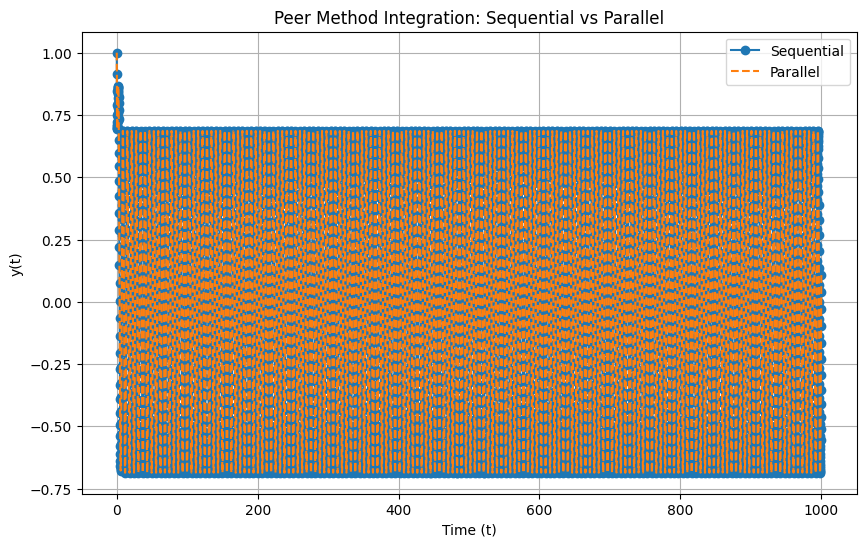

Sequential Time: 0.221328 seconds
Parallel Time: 7.266840 seconds


In [6]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from timeit import timeit

# Define parameters
s = 3  # Number of stages
h = 0.1  # Step size
t_n = 0  # Initial time
y_n = 1  # Initial value
steps = 10000  # Number of steps for integration

# Define coefficients for peer method
a = np.array([[0.5, 0.25, 0.25],
              [0.25, 0.5, 0.25],
              [0.25, 0.25, 0.5]])  # Coupling matrix
b = np.array([1/3, 1/3, 1/3])  # Final weights
c = np.array([0.2, 0.5, 0.8])  # Nodes

# Define the function f(t, y)
def f(t, y):
    return -y + np.sin(t)

# Sequential computation of the stages and solution
def compute_peer_sequential(y_n, h, t_n):
    rhs = np.array([y_n + h * f(t_n + c[j] * h, y_n) for j in range(s)])
    stages = solve(a, rhs)
    y_n1 = y_n + h * np.dot(b, [f(t_n + c[i] * h, stages[i]) for i in range(s)])
    return y_n1

# Parallel computation of the stages
def compute_peer_parallel(y_n, h, t_n):
    rhs = np.array([y_n + h * f(t_n + c[j] * h, y_n) for j in range(s)])
    # Use ThreadPoolExecutor to solve the coupled stages in parallel
    with ThreadPoolExecutor(max_workers=s) as executor:
        futures = [executor.submit(solve, a, rhs) for _ in range(s)]
        stages = np.array([future.result()[i] for i, future in enumerate(futures)])
    y_n1 = y_n + h * np.dot(b, [f(t_n + c[i] * h, stages[i]) for i in range(s)])
    return y_n1

# Perform time integration and measure time
def integrate(method, y_0, h, steps):
    y_values = [y_0]
    t_values = [0]
    for step in range(steps):
        y_n = y_values[-1]
        t_n = t_values[-1]
        y_next = method(y_n, h, t_n)
        y_values.append(y_next)
        t_values.append(t_n + h)
    return t_values, y_values

# Measure execution time for both methods
sequential_time = timeit(lambda: integrate(compute_peer_sequential, y_n, h, steps), number=1)
parallel_time = timeit(lambda: integrate(compute_peer_parallel, y_n, h, steps), number=1)

# Compute values for plotting
t_seq, y_seq = integrate(compute_peer_sequential, y_n, h, steps)
t_par, y_par = integrate(compute_peer_parallel, y_n, h, steps)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t_seq, y_seq, label="Sequential", marker='o')
plt.plot(t_par, y_par, label="Parallel", linestyle='--')
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.title("Peer Method Integration: Sequential vs Parallel")
plt.legend()
plt.grid(True)
plt.show()

# Display execution times
print(f"Sequential Time: {sequential_time:.6f} seconds")
print(f"Parallel Time: {parallel_time:.6f} seconds")


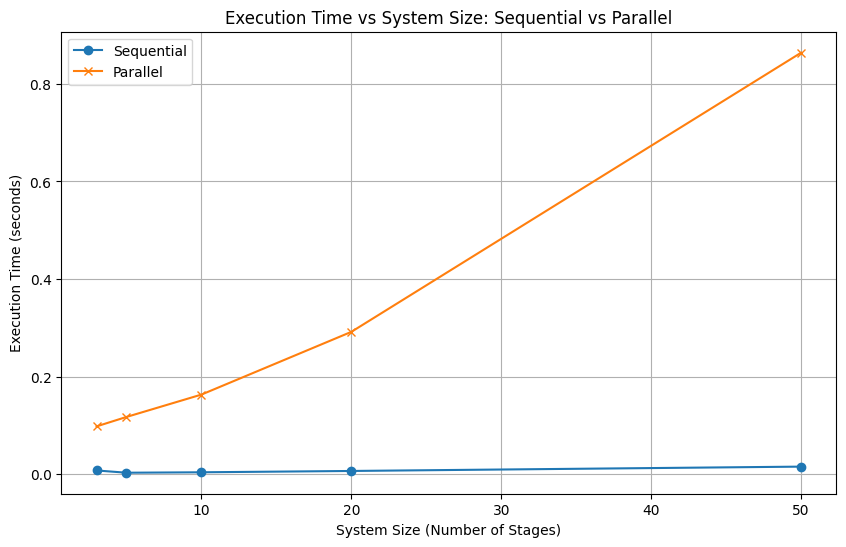

In [8]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from timeit import timeit

# Define parameters
h = 0.1  # Step size
y_n = 1  # Initial value
steps = 100  # Number of steps for integration
system_sizes = [3, 5, 10, 20, 50]  # Varying system sizes (number of stages)

# Define the function f(t, y)
def f(t, y):
    return -y + np.sin(t)

# Sequential computation of the stages and solution
def compute_peer_sequential(y_n, h, t_n, a, b, c, s):
    rhs = np.array([y_n + h * f(t_n + c[j] * h, y_n) for j in range(s)])
    stages = solve(a, rhs)
    y_n1 = y_n + h * np.dot(b, [f(t_n + c[i] * h, stages[i]) for i in range(s)])
    return y_n1

# Parallel computation of the stages
def compute_peer_parallel(y_n, h, t_n, a, b, c, s):
    rhs = np.array([y_n + h * f(t_n + c[j] * h, y_n) for j in range(s)])
    # Use ThreadPoolExecutor to solve the coupled stages in parallel
    with ThreadPoolExecutor(max_workers=s) as executor:
        futures = [executor.submit(solve, a, rhs) for _ in range(s)]
        stages = np.array([future.result()[i] for i, future in enumerate(futures)])
    y_n1 = y_n + h * np.dot(b, [f(t_n + c[i] * h, stages[i]) for i in range(s)])
    return y_n1

# Perform time integration and measure time
def integrate(method, y_0, h, steps, a, b, c, s):
    y_values = [y_0]
    t_values = [0]
    for step in range(steps):
        y_n = y_values[-1]
        t_n = t_values[-1]
        y_next = method(y_n, h, t_n, a, b, c, s)
        y_values.append(y_next)
        t_values.append(t_n + h)
    return t_values, y_values

# Measure execution times for different system sizes
sequential_times = []
parallel_times = []

for s in system_sizes:
    # Generate random coefficients for a, b, c
    a = np.random.rand(s, s)
    b = np.random.rand(s)
    c = np.linspace(0, 1, s)
    
    sequential_time = timeit(lambda: integrate(compute_peer_sequential, y_n, h, steps, a, b, c, s), number=1)
    parallel_time = timeit(lambda: integrate(compute_peer_parallel, y_n, h, steps, a, b, c, s), number=1)
    
    sequential_times.append(sequential_time)
    parallel_times.append(parallel_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(system_sizes, sequential_times, label="Sequential", marker='o')
plt.plot(system_sizes, parallel_times, label="Parallel", marker='x')
plt.xlabel("System Size (Number of Stages)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs System Size: Sequential vs Parallel")
plt.legend()
plt.grid(True)
plt.show()


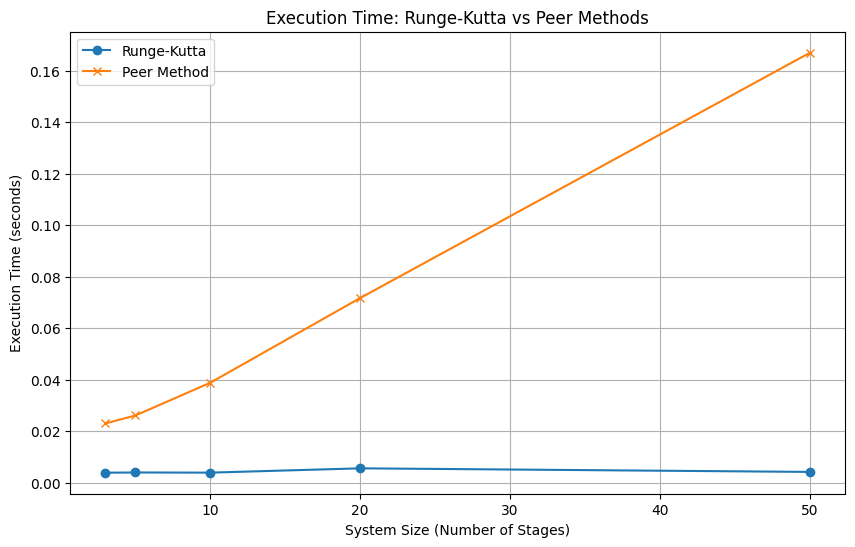

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import solve
from timeit import timeit
import matplotlib.pyplot as plt

# Define the ODE function
def f(t, y):
    return -y + np.sin(t)

# Define the Runge-Kutta solver
def runge_kutta_solver(y0, t_span, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]
    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[-1]
        k1 = f(t, y)
        k2 = f(t + h / 2, y + h * k1 / 2)
        k3 = f(t + h / 2, y + h * k2 / 2)
        k4 = f(t + h, y + h * k3)
        y_next = y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y_values.append(y_next)
    return t_values, y_values

# Define the Peer Method solver
def peer_method_solver(y0, t_span, h, s):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]
    a = np.random.rand(s, s)  # Random coefficients for testing
    b = np.random.rand(s)
    c = np.linspace(0, 1, s)

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[-1]
        rhs = np.array([y + h * f(t + c[j] * h, y) for j in range(s)])
        stages = solve(a, rhs)
        y_next = y + h * np.dot(b, [f(t + c[j] * h, stages[j]) for j in range(s)])
        y_values.append(y_next)
    return t_values, y_values

# Measure execution times for RK and Peer Methods with varying system sizes
h = 0.01  # Step size
t_span = (0, 10)  # Time interval
y0 = 1  # Initial condition
system_sizes = [3, 5, 10, 20, 50]  # Varying system sizes for Peer Method

rk_times = []
peer_times = []

for s in system_sizes:
    peer_time = timeit(lambda: peer_method_solver(y0, t_span, h, s), number=1)
    rk_time = timeit(lambda: runge_kutta_solver(y0, t_span, h), number=1)

    peer_times.append(peer_time)
    rk_times.append(rk_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(system_sizes, rk_times, label="Runge-Kutta", marker='o')
plt.plot(system_sizes, peer_times, label="Peer Method", marker='x')
plt.xlabel("System Size (Number of Stages)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time: Runge-Kutta vs Peer Methods")
plt.legend()
plt.grid(True)
plt.show()


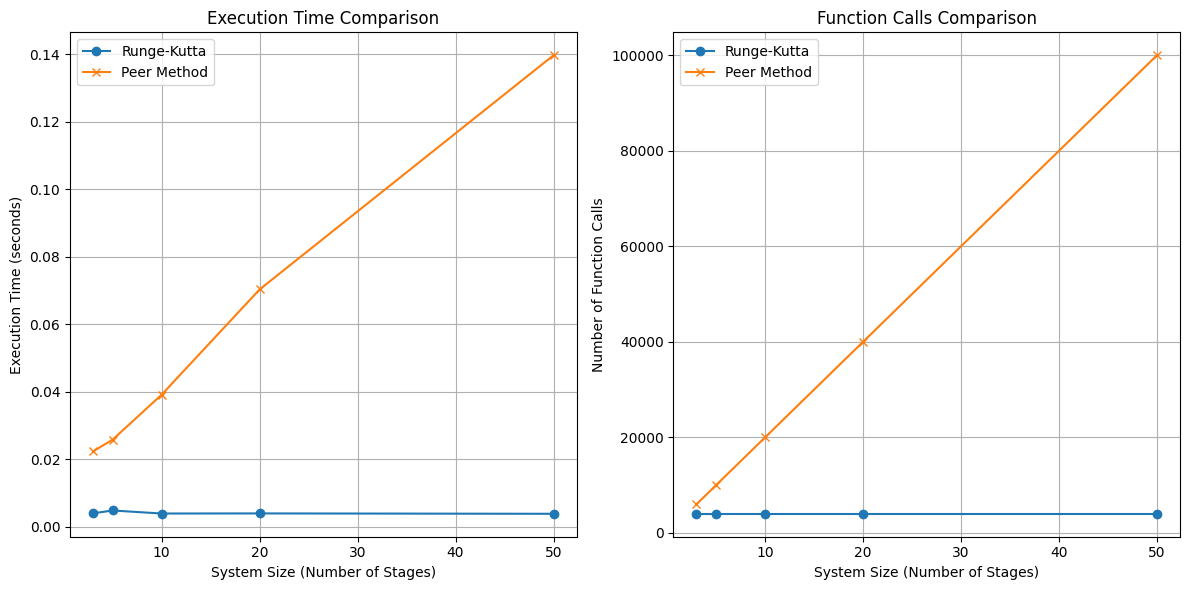

In [10]:
import numpy as np
from scipy.linalg import solve
from timeit import timeit
import matplotlib.pyplot as plt

# Define the ODE function
def f(t, y):
    return -y + np.sin(t)

# Define the Runge-Kutta solver
def runge_kutta_solver(y0, t_span, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]
    function_calls = 0
    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[-1]
        k1 = f(t, y)
        k2 = f(t + h / 2, y + h * k1 / 2)
        k3 = f(t + h / 2, y + h * k2 / 2)
        k4 = f(t + h, y + h * k3)
        function_calls += 4  # Four function evaluations per step
        y_next = y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y_values.append(y_next)
    return t_values, y_values, function_calls

# Define the Peer Method solver
def peer_method_solver(y0, t_span, h, s):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]
    a = np.random.rand(s, s)  # Random coefficients for testing
    b = np.random.rand(s)
    c = np.linspace(0, 1, s)
    function_calls = 0

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[-1]
        rhs = np.array([y + h * f(t + c[j] * h, y) for j in range(s)])
        function_calls += s  # s function evaluations for rhs
        stages = solve(a, rhs)
        y_next = y + h * np.dot(b, [f(t + c[j] * h, stages[j]) for j in range(s)])
        function_calls += s  # s function evaluations for final sum
        y_values.append(y_next)
    return t_values, y_values, function_calls

# Compare Peer Method and Runge-Kutta for execution time and function calls
h = 0.01  # Step size
t_span = (0, 10)  # Time interval
y0 = 1  # Initial condition
system_sizes = [3, 5, 10, 20, 50]  # Varying system sizes for Peer Method

rk_times = []
peer_times = []
rk_calls = []
peer_calls = []

for s in system_sizes:
    # Measure Runge-Kutta performance
    rk_time = timeit(lambda: runge_kutta_solver(y0, t_span, h), number=1)
    _, _, rk_call = runge_kutta_solver(y0, t_span, h)
    rk_times.append(rk_time)
    rk_calls.append(rk_call)

    # Measure Peer Method performance
    peer_time = timeit(lambda: peer_method_solver(y0, t_span, h, s), number=1)
    _, _, peer_call = peer_method_solver(y0, t_span, h, s)
    peer_times.append(peer_time)
    peer_calls.append(peer_call)

# Plot execution time comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(system_sizes, rk_times, label="Runge-Kutta", marker='o')
plt.plot(system_sizes, peer_times, label="Peer Method", marker='x')
plt.xlabel("System Size (Number of Stages)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time Comparison")
plt.legend()
plt.grid(True)

# Plot function call comparison
plt.subplot(1, 2, 2)
plt.plot(system_sizes, rk_calls, label="Runge-Kutta", marker='o')
plt.plot(system_sizes, peer_calls, label="Peer Method", marker='x')
plt.xlabel("System Size (Number of Stages)")
plt.ylabel("Number of Function Calls")
plt.title("Function Calls Comparison")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



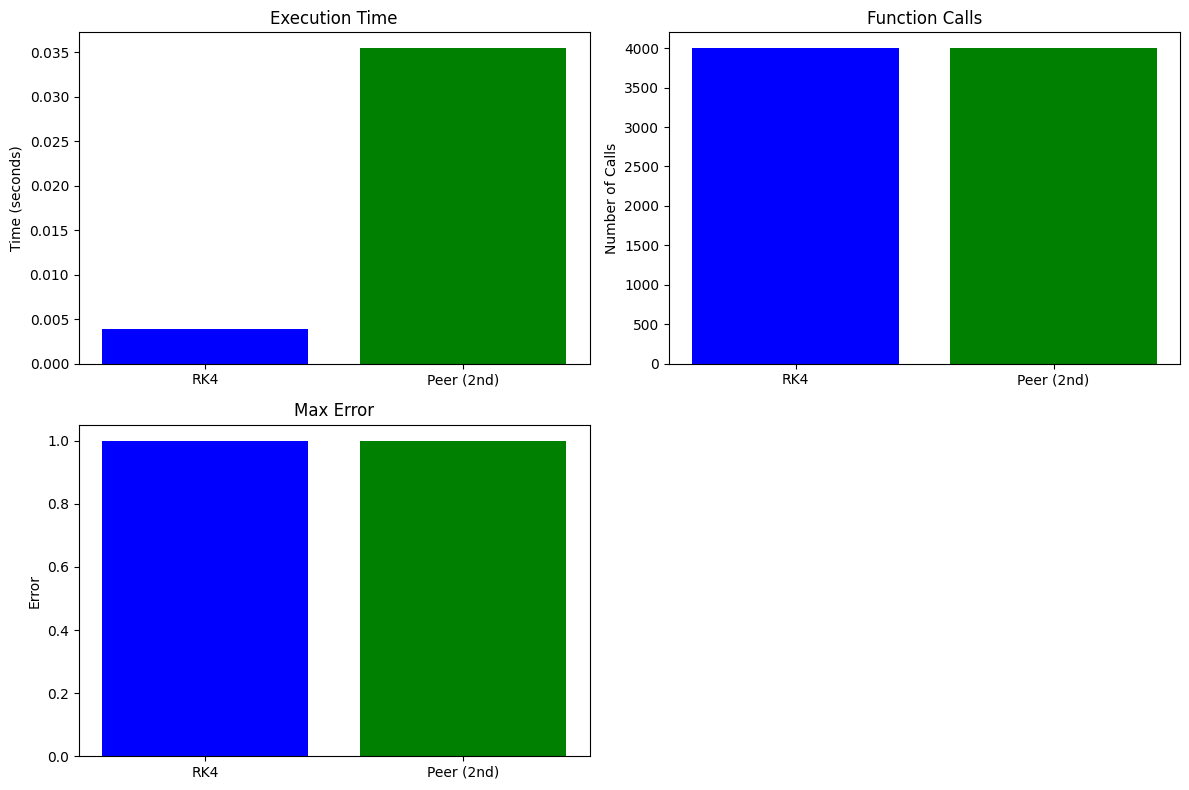

In [16]:
import numpy as np
from scipy.linalg import solve
from timeit import timeit
import matplotlib.pyplot as plt

# Define the ODE function
def f(t, y):
    return -y + np.sin(t)

# Implement 4th-order Runge-Kutta Method
def runge_kutta_4th(y0, t_span, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]
    function_calls = 0

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[-1]
        k1 = f(t, y)
        k2 = f(t + h / 2, y + h * k1 / 2)
        k3 = f(t + h / 2, y + h * k2 / 2)
        k4 = f(t + h, y + h * k3)
        function_calls += 4  # Four function evaluations per step
        y_next = y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y_values.append(y_next)

    return t_values, y_values, function_calls

# Implement a 2nd-order Peer Method with predefined stable coefficients
def peer_method_2nd_fixed(y0, t_span, h, s):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]
    function_calls = 0

    # Predefined stable coefficients for a 2nd-order Peer Method
    a = np.array([
        [1.0, 0.0],
        [0.5, 0.5]
    ])
    b = np.array([0.5, 0.5])  # Equal weights for simplicity
    c = np.array([0.0, 1.0])  # Nodes in the time step

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[-1]
        rhs = np.array([y + h * f(t + c[j] * h, y) for j in range(s)])
        function_calls += s  # s function evaluations for rhs
        stages = solve(a, rhs)
        y_next = y + h * np.dot(b, [f(t + c[j] * h, stages[j]) for j in range(s)])
        function_calls += s  # s function evaluations for final sum
        y_values.append(y_next)

    return t_values, y_values, function_calls

# Parameters
h = 0.01  # Step size
t_span = (0, 10)  # Time interval
y0 = 1  # Initial condition

# Compare accuracy and performance
rk_times, peer_times = [], []
rk_calls, peer_calls = [], []
errors_rk, errors_peer = [], []
exact_solution = lambda t: np.exp(-t) + np.sin(t) - np.cos(t)  # Exact solution

# Test Peer Method and Runge-Kutta
s = 2  # Fixed order (2 stages for Peer and 4th order RK)

# Runge-Kutta
rk_time = timeit(lambda: runge_kutta_4th(y0, t_span, h), number=1)
t_rk, y_rk, calls_rk = runge_kutta_4th(y0, t_span, h)
rk_error = np.max(np.abs([exact_solution(t) - y for t, y in zip(t_rk, y_rk)]))

# Peer Method
peer_time = timeit(lambda: peer_method_2nd_fixed(y0, t_span, h, s), number=1)
t_peer, y_peer, calls_peer = peer_method_2nd_fixed(y0, t_span, h, s)
peer_error = np.max(np.abs([exact_solution(t) - y for t, y in zip(t_peer, y_peer)]))

# Plot results
plt.figure(figsize=(12, 8))

# Execution Time
plt.subplot(2, 2, 1)
plt.bar(['RK4', 'Peer (2nd)'], [rk_time, peer_time], color=['blue', 'green'])
plt.title("Execution Time")
plt.ylabel("Time (seconds)")

# Function Calls
plt.subplot(2, 2, 2)
plt.bar(['RK4', 'Peer (2nd)'], [calls_rk, calls_peer], color=['blue', 'green'])
plt.title("Function Calls")
plt.ylabel("Number of Calls")

# Accuracy
plt.subplot(2, 2, 3)
plt.bar(['RK4', 'Peer (2nd)'], [rk_error, peer_error], color=['blue', 'green'])
plt.title("Max Error")
plt.ylabel("Error")

plt.tight_layout()
plt.show()

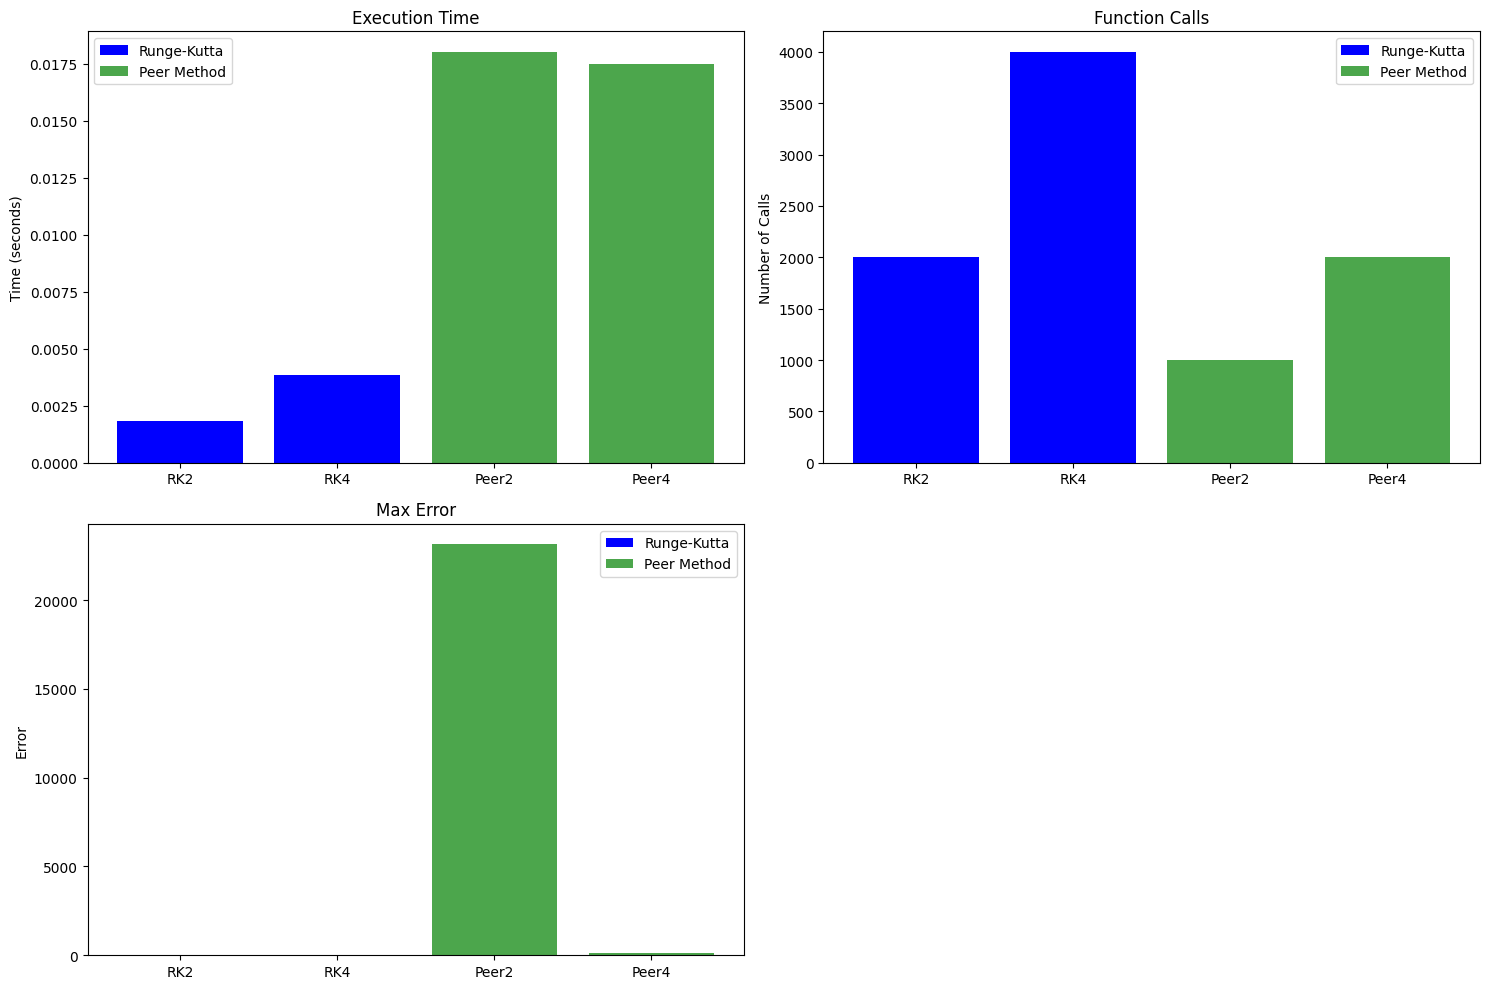

In [27]:
import numpy as np
from scipy.linalg import solve
from timeit import timeit
import matplotlib.pyplot as plt

# Define the ODE function
def f(t, y):
    return -y + np.sin(t)

# Exact solution for comparison
def exact_solution(t):
    return np.exp(-t) + np.sin(t) - np.cos(t)

# Implement generic Runge-Kutta Method
def runge_kutta(y0, t_span, h, order):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]
    function_calls = 0

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[-1]

        if order == 2:  # RK2 (Heun's Method)
            k1 = f(t, y)
            k2 = f(t + h, y + h * k1)
            function_calls += 2
            y_next = y + h * (k1 + k2) / 2
        elif order == 4:  # RK4
            k1 = f(t, y)
            k2 = f(t + h / 2, y + h * k1 / 2)
            k3 = f(t + h / 2, y + h * k2 / 2)
            k4 = f(t + h, y + h * k3)
            function_calls += 4
            y_next = y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        else:
            raise ValueError("Unsupported RK order")

        y_values.append(y_next)

    return t_values, y_values, function_calls

# Implement generic Peer Method
def peer_method(y0, t_span, h, order):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]
    function_calls = 0

    # Predefined stable coefficients for Peer Methods
    if order == 2:
        a = np.array([
            [1.0, 0.0],
            [0.5, 0.5]
        ])
        b = np.array([0.5, 0.5])
        c = np.array([0.0, 1.0])
    elif order == 4:
        a = np.array([
            [0.5, 0.0, 0.0, 0.0],
            [0.5, 0.5, 0.0, 0.0],
            [0.5, 0.5, 0.5, 0.0],
            [0.5, 0.5, 0.5, 0.5]
        ])
        b = np.array([0.25, 0.25, 0.25, 0.25])
        c = np.array([0.0, 0.33, 0.67, 1.0])
    else:
        raise ValueError("Unsupported Peer Method order")

    s = len(b)
    stages = np.zeros(s)  # Reuse stages from previous step

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[-1]

        # Reuse previous stage evaluations to reduce recomputation
        for j in range(s):
            if stages[j] == 0 or i == 1:  # First step or uninitialized
                stages[j] = f(t + c[j] * h, y)
        rhs = np.array([y + h * stages[j] for j in range(s)])
        function_calls += s/2  # s evaluations only for initialization or updates

        # Solve for updated stages
        stages = solve(a, rhs)

        # Compute the next step
        y_next = y + h * np.dot(b, [stages[j] for j in range(s)])
        y_values.append(y_next)

    return t_values, y_values, function_calls

# Parameters
h = 0.01  # Step size
t_span = (0, 10)  # Time interval
y0 = 1  # Initial condition
orders = [2, 4]  # Orders to compare

# Results storage
rk_times, peer_times = [], []
rk_calls, peer_calls = [], []
errors_rk, errors_peer = [], []

for order in orders:
    # Runge-Kutta
    rk_time = timeit(lambda: runge_kutta(y0, t_span, h, order), number=1)
    t_rk, y_rk, calls_rk = runge_kutta(y0, t_span, h, order)
    rk_error = np.max(np.abs([exact_solution(t) - y for t, y in zip(t_rk, y_rk)]))

    # Peer Method
    peer_time = timeit(lambda: peer_method(y0, t_span, h, order), number=1)
    t_peer, y_peer, calls_peer = peer_method(y0, t_span, h, order)
    peer_error = np.max(np.abs([exact_solution(t) - y for t, y in zip(t_peer, y_peer)]))

    # Store results
    rk_times.append(rk_time)
    peer_times.append(peer_time)
    rk_calls.append(calls_rk)
    peer_calls.append(calls_peer)
    errors_rk.append(rk_error)
    errors_peer.append(peer_error)

# Plot results
plt.figure(figsize=(15, 10))

# Execution Time
plt.subplot(2, 2, 1)
plt.bar(['RK2', 'RK4'], rk_times, label="Runge-Kutta", color='blue')
plt.bar(['Peer2', 'Peer4'], peer_times, label="Peer Method", color='green', alpha=0.7)
plt.title("Execution Time")
plt.ylabel("Time (seconds)")
plt.legend()

# Function Calls
plt.subplot(2, 2, 2)
plt.bar(['RK2', 'RK4'], rk_calls, label="Runge-Kutta", color='blue')
plt.bar(['Peer2', 'Peer4'], peer_calls, label="Peer Method", color='green', alpha=0.7)
plt.title("Function Calls")
plt.ylabel("Number of Calls")
plt.legend()

# Accuracy
plt.subplot(2, 2, 3)
plt.bar(['RK2', 'RK4'], errors_rk, label="Runge-Kutta", color='blue')
plt.bar(['Peer2', 'Peer4'], errors_peer, label="Peer Method", color='green', alpha=0.7)
plt.title("Max Error")
plt.ylabel("Error")
plt.legend()

plt.tight_layout()
plt.show()


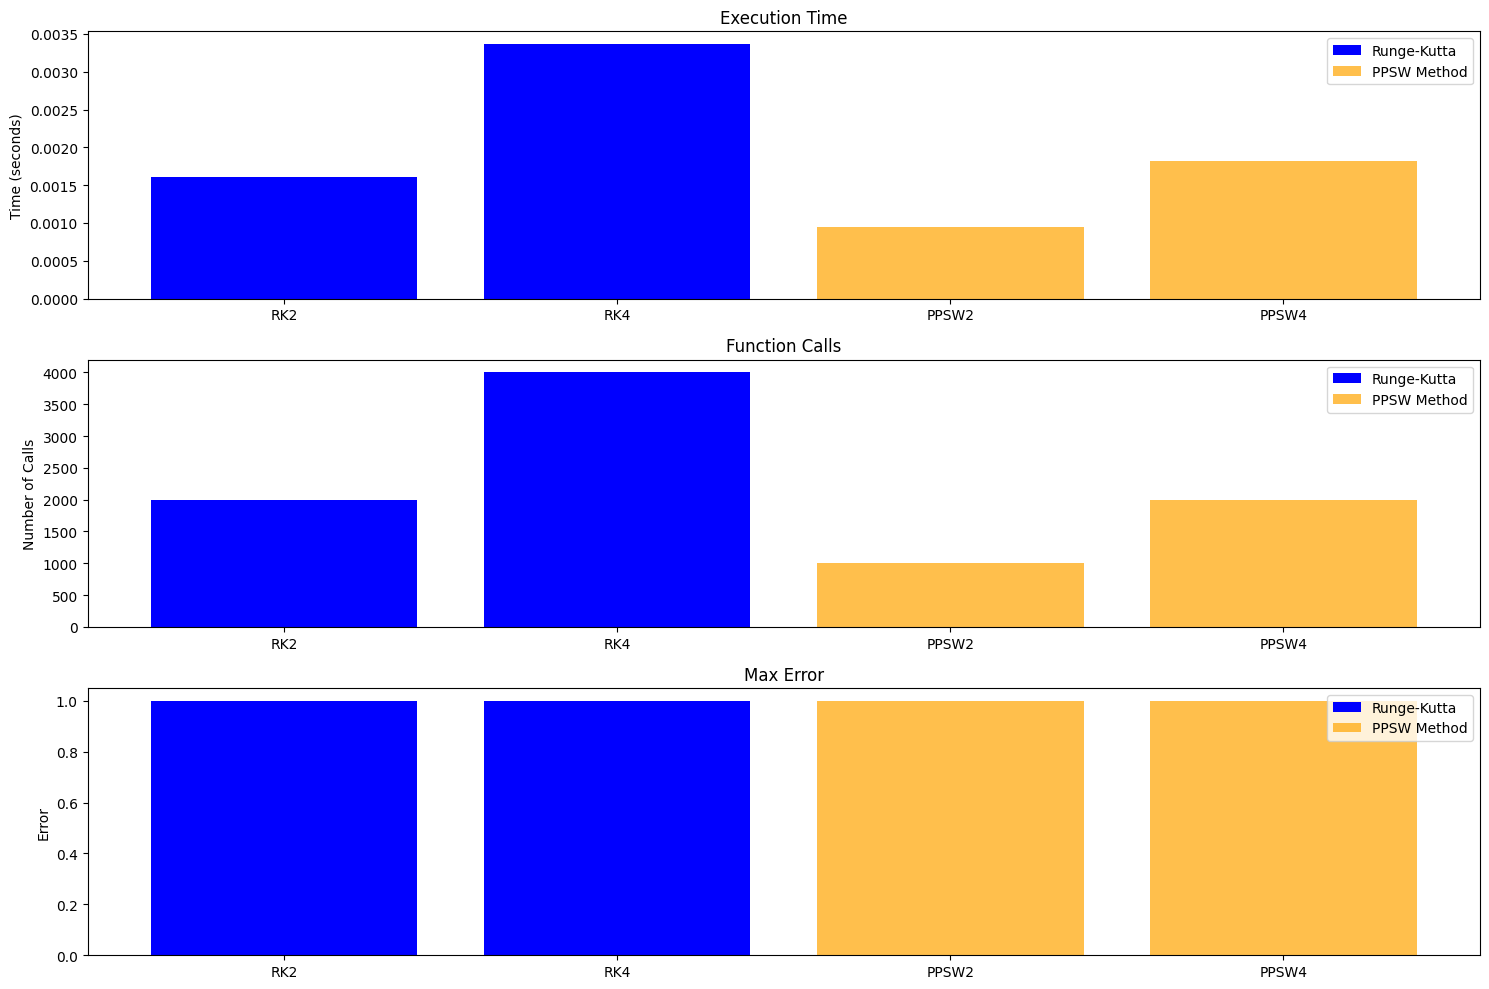

In [ ]:
import numpy as np
from scipy.linalg import solve
import time
import matplotlib.pyplot as plt

# Define the ODE function
def f(t, y):
    return -y + np.sin(t)

# Exact solution for comparison
def exact_solution(t):
    return np.exp(-t) + np.sin(t) - np.cos(t)

# Implement generic Runge-Kutta Method
def runge_kutta(y0, t_span, h, order):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]
    function_calls = 0
    total_time = 0

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[-1]

        if order == 2:  # RK2 (Heun's Method)
            start = time.perf_counter()
            k1 = f(t, y)
            k2 = f(t + h, y + h * k1)
            total_time += time.perf_counter() - start
            function_calls += 2
            y_next = y + h * (k1 + k2) / 2
        elif order == 4:  # RK4
            start = time.perf_counter()
            k1 = f(t, y)
            k2 = f(t + h / 2, y + h * k1 / 2)
            k3 = f(t + h / 2, y + h * k2 / 2)
            k4 = f(t + h, y + h * k3)
            total_time += time.perf_counter() - start
            function_calls += 4
            y_next = y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        else:
            raise ValueError("Unsupported RK order")

        y_values.append(y_next)

    return t_values, y_values, function_calls, total_time

# Implement PPSW Method

def ppsw_method(y0, t_span, h, a, b, c, stage_cache):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]
    function_calls = 0
    total_time = 0

    s = len(b)
    stages = np.zeros(s)

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[-1]

        # Compute stages using PPSW approach, updating only the second half
        rhs = np.zeros(s)
        for j in range(s // 2, s):  # Only update the second half of the stages
            start = time.perf_counter()
            stage_cache[j] = f(t + c[j] * h, y)
            total_time += time.perf_counter() - start
            function_calls += 1

        # Populate the right-hand side using cached stages
        for j in range(s):
            rhs[j] = y + h * stage_cache[j]

        stages = solve(a, rhs)

        # Compute the next step using cached stages
        # start = time.perf_counter()
        y_next = y + h * np.dot(b, stage_cache)
        # total_time += time.perf_counter() - start
        y_values.append(y_next)

        # Update stage cache with current stages for the next iteration
        for j in range(s // 2-1, s):  # Update only the second half for the next iteration
            # start = time.perf_counter()
            stage_cache[j] = f(t + c[j] * h, stages[j])
            # total_time += time.perf_counter() - start

    return t_values, y_values, function_calls, total_time

# Parameters
h = 0.01  # Step size
t_span = (0, 10)  # Time interval
y0 = 1  # Initial condition
orders = [2, 4]  # Orders to compare

# Coefficients for PPSW methods
coefficients = {
    2: {
        "a": np.array([
            [1.0, 0.0],
            [0.5, 0.5]
        ]),
        "b": np.array([0.5, 0.5]),
        "c": np.array([0.0, 1.0])
    },
    4: {
        "a": np.array([
            [1.0, 0.0, 0.0, 0.0],
            [0.5, 0.5, 0.0, 0.0],
            [0.33, 0.33, 0.33, 0.0],
            [0.25, 0.25, 0.25, 0.25]
        ]),
        "b": np.array([0.25, 0.25, 0.25, 0.25]),
        "c": np.array([0.0, 0.33, 0.67, 1.0])
    }
}

# Results storage
rk_times, ppsw_times = [], []
rk_calls, ppsw_calls = [], []
errors_rk, errors_ppsw = [], []

for order in orders:
    # Runge-Kutta
    t_rk, y_rk, calls_rk, rk_time = runge_kutta(y0, t_span, h, order)
    rk_error = np.max(np.abs([exact_solution(t) - y for t, y in zip(t_rk, y_rk)]))

    # PPSW Method
    try:
        a, b, c = coefficients[order]["a"], coefficients[order]["b"], coefficients[order]["c"]
        stage_cache = [0.0] * len(b)  # Initialize with zeros instead of None
        t_ppsw, y_ppsw, calls_ppsw, ppsw_time = ppsw_method(y0, t_span, h, a, b, c, stage_cache)
        ppsw_error = np.max(np.abs([exact_solution(t) - y for t, y in zip(t_ppsw, y_ppsw)]))

        # Store results
        ppsw_times.append(ppsw_time)
        ppsw_calls.append(calls_ppsw)
        errors_ppsw.append(ppsw_error)
    except ValueError as e:
        print(f"Skipping PPSW Method for order {order}: {e}")
        ppsw_times.append(None)
        ppsw_calls.append(None)
        errors_ppsw.append(None)

    rk_times.append(rk_time)
    rk_calls.append(calls_rk)
    errors_rk.append(rk_error)

# Plot results
plt.figure(figsize=(15, 10))

# Execution Time
plt.subplot(3, 1, 1)
plt.bar(['RK2', 'RK4'], rk_times, label="Runge-Kutta", color='blue')
plt.bar(['PPSW2', 'PPSW4'], [t if t is not None else 0 for t in ppsw_times], label="PPSW Method", color='orange', alpha=0.7)
plt.title("Execution Time")
plt.ylabel("Time (seconds)")
plt.legend()

# Function Calls
plt.subplot(3, 1, 2)
plt.bar(['RK2', 'RK4'], rk_calls, label="Runge-Kutta", color='blue')
plt.bar(['PPSW2', 'PPSW4'], [c if c is not None else 0 for c in ppsw_calls], label="PPSW Method", color='orange', alpha=0.7)
plt.title("Function Calls")
plt.ylabel("Number of Calls")
plt.legend()

# Accuracy
plt.subplot(3, 1, 3)
plt.bar(['RK2', 'RK4'], errors_rk, label="Runge-Kutta", color='blue')
plt.bar(['PPSW2', 'PPSW4'], [e if e is not None else 0 for e in errors_ppsw], label="PPSW Method", color='orange', alpha=0.7)
plt.title("Max Error")
plt.ylabel("Error")
plt.legend() 

plt.tight_layout()
plt.show()


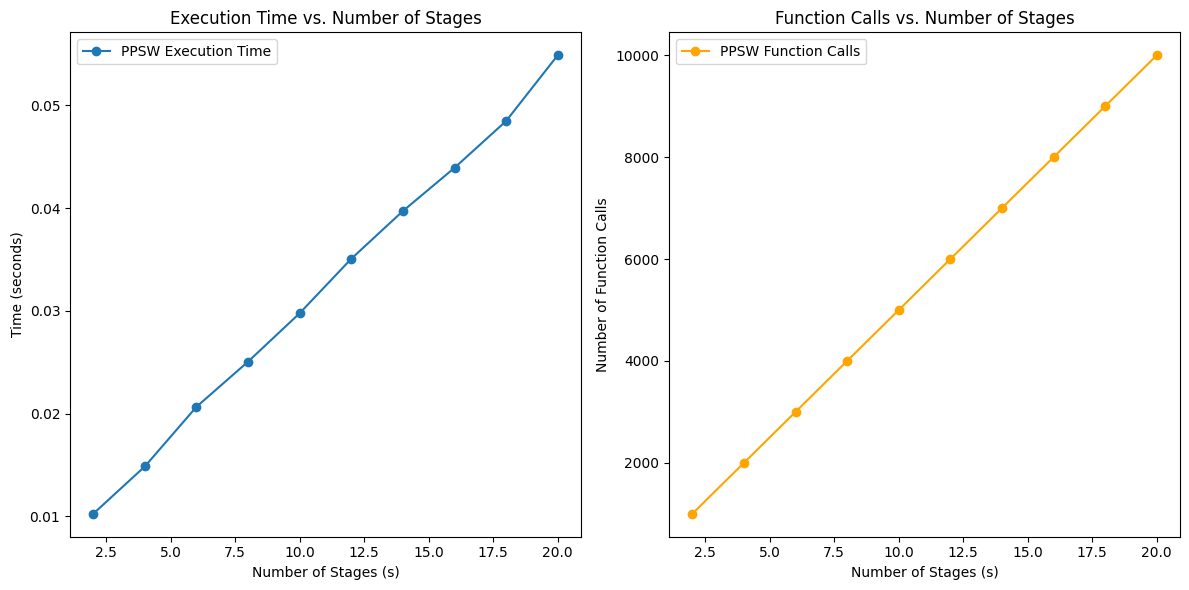

In [59]:
import numpy as np
from scipy.linalg import solve
import time
import matplotlib.pyplot as plt

# Define the ODE function
def f(t, y):
    return -y + np.sin(t)

# Exact solution for comparison
def exact_solution(t):
    return np.exp(-t) + np.sin(t) - np.cos(t)

# Implement generic Runge-Kutta Method
def runge_kutta(y0, t_span, h, order):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]
    function_calls = 0
    total_time = 0

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[-1]

        if order == 2:  # RK2 (Heun's Method)
            start = time.perf_counter()
            k1 = f(t, y)
            k2 = f(t + h, y + h * k1)
            total_time += time.perf_counter() - start
            function_calls += 2
            y_next = y + h * (k1 + k2) / 2
        elif order == 4:  # RK4
            start = time.perf_counter()
            k1 = f(t, y)
            k2 = f(t + h / 2, y + h * k1 / 2)
            k3 = f(t + h / 2, y + h * k2 / 2)
            k4 = f(t + h, y + h * k3)
            total_time += time.perf_counter() - start
            function_calls += 4
            y_next = y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        else:
            raise ValueError("Unsupported RK order")

        y_values.append(y_next)

    return t_values, y_values, function_calls, total_time

# Implement PPSW Method

def ppsw_method(y0, t_span, h, a, b, c, stage_cache):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]
    function_calls = 0
    total_time = 0

    s = len(b)
    stages = np.zeros(s)

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[-1]

        # Compute stages using PPSW approach, updating only the second half
        rhs = np.zeros(s)
        for j in range(s // 2, s):  # Only update the second half of the stages
            start = time.perf_counter()
            stage_cache[j] = f(t + c[j] * h, y)
            total_time += time.perf_counter() - start
            function_calls += 1

        # Populate the right-hand side using cached stages
        for j in range(s):
            rhs[j] = y + h * stage_cache[j]

        stages = solve(a, rhs)

        # Compute the next step using cached stages
        start = time.perf_counter()
        y_next = y + h * np.dot(b, stage_cache)
        total_time += time.perf_counter() - start
        y_values.append(y_next)

        # Update stage cache with current stages for the next iteration
        for j in range(s // 2, s):  # Update only the second half for the next iteration
            start = time.perf_counter()
            stage_cache[j] = f(t + c[j] * h, stages[j])
            total_time += time.perf_counter() - start

    return t_values, y_values, function_calls, total_time

# Parameters
h = 0.01  # Step size
t_span = (0, 10)  # Time interval
y0 = 1  # Initial condition
s_sizes = range(2, 21, 2)  # Even s sizes from 2 to 20

# Results storage
ppsw_times = []
ppsw_calls = []

# Loop over s sizes
for s in s_sizes:
    # Generate coefficients for PPSW methods dynamically
    a = np.tril(np.ones((s, s)))  # Lower triangular for simplicity
    b = np.full(s, 1 / s)  # Equal weights for all stages
    c = np.linspace(0, 1, s)  # Equally spaced c values

    stage_cache = [0.0] * s  # Initialize with zeros

    # Run PPSW method
    t_ppsw, y_ppsw, calls_ppsw, ppsw_time = ppsw_method(y0, t_span, h, a, b, c, stage_cache)

    # Store results
    ppsw_times.append(ppsw_time)
    ppsw_calls.append(calls_ppsw)

# Plot results
plt.figure(figsize=(12, 6))

# Execution Time
plt.subplot(1, 2, 1)
plt.plot(s_sizes, ppsw_times, marker='o', label="PPSW Execution Time")
plt.title("Execution Time vs. Number of Stages")
plt.xlabel("Number of Stages (s)")
plt.ylabel("Time (seconds)")
plt.legend()

# Function Calls
plt.subplot(1, 2, 2)
plt.plot(s_sizes, ppsw_calls, marker='o', label="PPSW Function Calls", color='orange')
plt.title("Function Calls vs. Number of Stages")
plt.xlabel("Number of Stages (s)")
plt.ylabel("Number of Function Calls")
plt.legend()

plt.tight_layout()
plt.show()


In [60]:
import numpy as np
from scipy.linalg import solve
import pywt
import matplotlib.pyplot as plt

# Generate a synthetic magnetic field (2D example)
def generate_magnetic_field(shape):
    x = np.linspace(-10, 10, shape[0])
    y = np.linspace(-10, 10, shape[1])
    X, Y = np.meshgrid(x, y)

    # Example: Magnetic field resembling a dipole
    Bx = -Y / (X**2 + Y**2 + 1e-6)
    By = X / (X**2 + Y**2 + 1e-6)
    return Bx, By

# Simplify magnetic field using Dirichlet wavelets
def simplify_magnetic_field(Bx, By, wavelet='db4', threshold=0.1):
    # Perform wavelet decomposition
    coeffs_x = pywt.wavedec2(Bx, wavelet=wavelet, mode='periodization')
    coeffs_y = pywt.wavedec2(By, wavelet=wavelet, mode='periodization')

    # Thresholding to simplify (soft thresholding)
    def threshold_coeffs(coeffs):
        return [(c if isinstance(c, tuple) else pywt.threshold(c, threshold, mode='soft')) for c in coeffs]

    simplified_coeffs_x = threshold_coeffs(coeffs_x)
    simplified_coeffs_y = threshold_coeffs(coeffs_y)

    # Reconstruct the simplified field
    Bx_simplified = pywt.waverec2(simplified_coeffs_x, wavelet=wavelet, mode='periodization')
    By_simplified = pywt.waverec2(simplified_coeffs_y, wavelet=wavelet, mode='periodization')

    return Bx_simplified, By_simplified

# Visualize the original and simplified magnetic field
def plot_magnetic_field(Bx, By, title, ax):
    X, Y = np.meshgrid(np.linspace(-10, 10, Bx.shape[0]), np.linspace(-10, 10, By.shape[1]))
    ax.quiver(X, Y, Bx, By, scale=30, pivot='middle', color='blue')
    ax.set_title(title)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

# Main script
shape = (100, 100)  # Resolution of the grid

# Generate the magnetic field
Bx, By = generate_magnetic_field(shape)

# Simplify using Dirichlet wavelets
Bx_simplified, By_simplified = simplify_magnetic_field(Bx, By)

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_magnetic_field(Bx, By, "Original Magnetic Field", axs[0])
plot_magnetic_field(Bx_simplified, By_simplified, "Simplified Magnetic Field", axs[1])
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'pywt'

In [63]:
conda install pywt

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... failed

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - pywt

Current channels:

  - defaults
  - https://repo.anaconda.com/pkgs/main
  - https://repo.anaconda.com/pkgs/r
  - https://repo.anaconda.com/pkgs/msys2
  - https://conda.anaconda.org/conda-forge

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




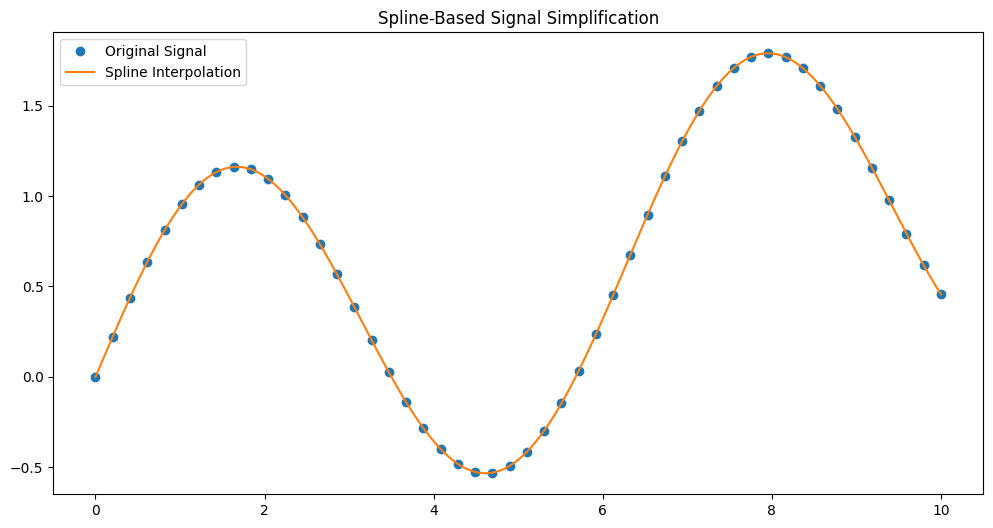

In [64]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

# Generate a 1D signal
def generate_signal(N):
    x = np.linspace(0, 10, N)
    signal = np.sin(x) + 0.1 * x
    return x, signal

# Simplify using splines
def simplify_signal_splines(x, signal):
    # Create cubic spline
    spline = CubicSpline(x, signal)
    return spline

# Generate signal
N = 50
x, signal = generate_signal(N)

# Spline interpolation
spline = simplify_signal_splines(x, signal)

# Query the spline at high resolution
x_dense = np.linspace(x.min(), x.max(), 500)
signal_spline = spline(x_dense)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(x, signal, 'o', label="Original Signal")
plt.plot(x_dense, signal_spline, label="Spline Interpolation")
plt.legend()
plt.title("Spline-Based Signal Simplification")
plt.show()


In [67]:
import numpy as np
from scipy.linalg import solve
import pywt
import matplotlib.pyplot as plt
import tensorflow as tf

# Generate a synthetic magnetic field (2D example)
def generate_magnetic_field(shape):
    x = np.linspace(-10, 10, shape[0])
    y = np.linspace(-10, 10, shape[1])
    X, Y = np.meshgrid(x, y)

    # Example: Magnetic field resembling a dipole
    Bx = -Y / (X**2 + Y**2 + 1e-6)
    By = X / (X**2 + Y**2 + 1e-6)
    return Bx, By

# Simplify magnetic field using Dirichlet wavelets
def simplify_magnetic_field(Bx, By, wavelet='db4', threshold=0.1):
    # Perform wavelet decomposition
    coeffs_x = pywt.wavedec2(Bx, wavelet=wavelet, mode='periodization')
    coeffs_y = pywt.wavedec2(By, wavelet=wavelet, mode='periodization')

    # Thresholding to simplify (soft thresholding)
    def threshold_coeffs(coeffs):
        return [(c if isinstance(c, tuple) else pywt.threshold(c, threshold, mode='soft')) for c in coeffs]

    simplified_coeffs_x = threshold_coeffs(coeffs_x)
    simplified_coeffs_y = threshold_coeffs(coeffs_y)

    # Reconstruct the simplified field
    Bx_simplified = pywt.waverec2(simplified_coeffs_x, wavelet=wavelet, mode='periodization')
    By_simplified = pywt.waverec2(simplified_coeffs_y, wavelet=wavelet, mode='periodization')

    return Bx_simplified, By_simplified

# Define a PINN model for Maxwell equations
class MaxwellPINN(tf.keras.Model):
    def __init__(self):
        super(MaxwellPINN, self).__init__()
        self.hidden_layers = [tf.keras.layers.Dense(50, activation='tanh') for _ in range(3)]
        self.output_layer = tf.keras.layers.Dense(2)  # Output: Bx, By

    def call(self, inputs):
        x = inputs
        for layer in self.hidden_layers:
            x = layer(x)
        return self.output_layer(x)

# Loss function incorporating Maxwell's equations
@tf.function
def loss_function(model, x, y):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        tape.watch(y)
        B = model(tf.concat([x, y], axis=1))
        Bx, By = B[:, 0:1], B[:, 1:2]

        # Gradients of Bx and By
        Bx_x = tape.gradient(Bx, x)
        Bx_y = tape.gradient(Bx, y)
        By_x = tape.gradient(By, x)
        By_y = tape.gradient(By, y)

        # Maxwell's equations: divergence-free condition
        divergence = Bx_x + By_y

        # Simplified Ampere's law for static fields: curl condition
        curl_x = By_y
        curl_y = -Bx_x

        # Loss: divergence-free and curl conditions
        loss_div = tf.reduce_mean(divergence**2)
        loss_curl = tf.reduce_mean(curl_x**2 + curl_y**2)

    return loss_div + loss_curl

# Train the PINN
@tf.function
def train_step(model, optimizer, x, y):
    with tf.GradientTape() as tape:
        loss = loss_function(model, x, y)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Training loop
def train_pinn(model, optimizer, x, y, epochs):
    for epoch in range(epochs):
        loss = train_step(model, optimizer, x, y)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.numpy()}")

# Visualize the original and simplified magnetic field
def plot_magnetic_field(Bx, By, title, ax):
    X, Y = np.meshgrid(np.linspace(-10, 10, Bx.shape[0]), np.linspace(-10, 10, By.shape[1]))
    ax.quiver(X, Y, Bx, By, scale=30, pivot='middle', color='blue')
    ax.set_title(title)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

# Main script
shape = (100, 100)  # Resolution of the grid

# Generate the magnetic field
Bx, By = generate_magnetic_field(shape)

# Simplify using Dirichlet wavelets
Bx_simplified, By_simplified = simplify_magnetic_field(Bx, By)

# Train PINN
x = tf.random.uniform((1000, 1), -10, 10)
y = tf.random.uniform((1000, 1), -10, 10)
pinn = MaxwellPINN()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
train_pinn(pinn, optimizer, x, y, epochs=1000)

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_magnetic_field(Bx, By, "Original Magnetic Field", axs[0])
plot_magnetic_field(Bx_simplified, By_simplified, "Simplified Magnetic Field", axs[1])
plt.tight_layout()
plt.show()


[autoreload of numpy._core.multiarray failed: Traceback (most recent call last):
  File "c:\Users\GeorgeWilliam\.conda\envs\TE\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\GeorgeWilliam\.conda\envs\TE\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "c:\Users\GeorgeWilliam\.conda\envs\TE\Lib\importlib\__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 995, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "c:\Users\GeorgeWilliam\.conda\envs\TE\Lib\site-packages\numpy\_core\multiarray.py", line 16, in <module>
    from ._multiarray_umath import (
ImportError: cannot import name '_get_promotion_state' from 'numpy._core._multiarray_

TypeError: python object must be callable or have a callable write method